# Proyek Klasifikasi Gambar
- **Nama:** Nuraisah
- **Email:** nuraisahnura2004@gmail.com
- **ID Dicoding:** nuraisah_oxzV

In [ ]:
from google.colab import drive
import zipfile, os, shutil, keras, cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pathlib

In [ ]:
import os
from google.colab import files

# Buat folder khusus untuk Kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# Upload kaggle.json
uploaded = files.upload()

# Pindahkan ke direktori yang sesuai
!mv kaggle.json /root/.kaggle/

# Pastikan permission benar
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d moazeldsokyx/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats
License(s): CC0-1.0
 99% 809M/817M [00:07<00:00, 79.4MB/s]
100% 817M/817M [00:07<00:00, 111MB/s] 


In [ ]:
import zipfile

# Ekstrak dataset
with zipfile.ZipFile("dogs-vs-cats.zip", "r") as zip_ref:
    zip_ref.extractall("dogs_vs_cats")

# Cek isi folder
!ls dogs_vs_cats

dataset


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,705 (1.93 MB)

 Trainable params: 503,809 (1.92 MB)

 Non-trainable params: 896 (3.50 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 254ms/step - accuracy: 0.5862 - loss: 0.6947 - val_accuracy: 0.6156 - val_loss: 0.6415 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.6177 - loss: 0.6532 - val_accuracy: 0.5348 - val_loss: 0.9082 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.6681 - loss: 0.6113 - val_accuracy: 0.6888 - val_loss: 0.5911 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.6898 - loss: 0.5807 - val_accuracy: 0.6330 - val_loss: 0.6518 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - accuracy: 0.7027 - loss: 0.5643 - val_accuracy: 0.5212 - val_loss: 1.0255 - learning_rate: 3.0000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.7354 - loss: 0.5281
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 24

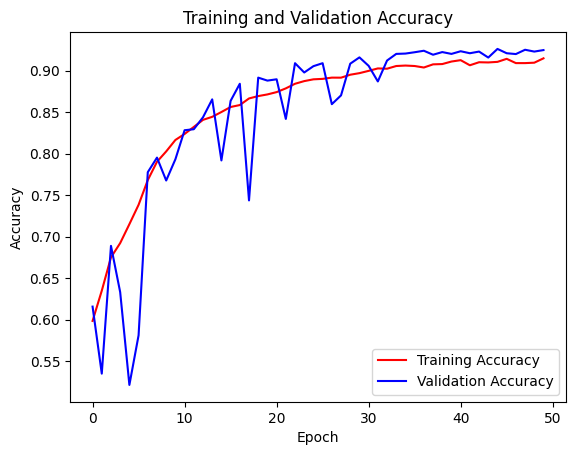

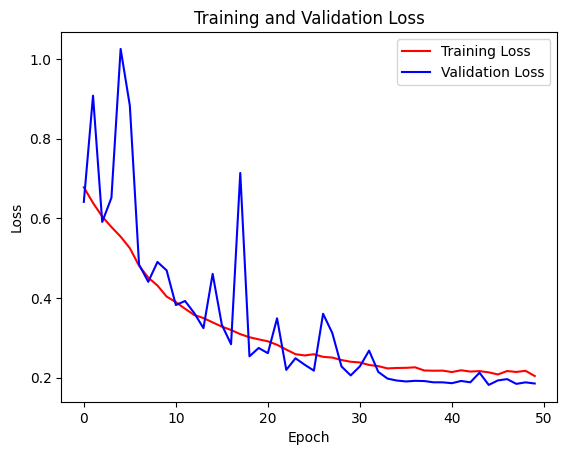

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Menentukan path dataset
data_path = "/content/dogs_vs_cats/dataset"
train_path = os.path.join(data_path, "train")
val_path = os.path.join(data_path, "validation")
test_path = os.path.join(data_path, "test")

# 2. Pastikan folder dataset ada
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# 3. Data Augmentation & Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# 4. Load dataset dengan ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 5. Membuat Model CNN
def create_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dropout(0.4),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    return model

model = create_model()

# 6. Menampilkan struktur model
model.summary()

# 7. Compile Model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0003), metrics=['accuracy'])

# 8. Callback Functions
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# 9. Melatih Model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler]
)

# 10. Evaluasi Model
print("Evaluasi pada Test Set:")
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# 11. Visualisasi Training vs Validation Accuracy dan Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saving cat (1003).jpg to cat (1003).jpg


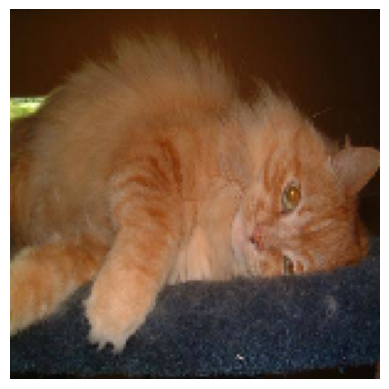

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw output from model: [[0.00320685]]
cat (1003).jpg -> Predicted: Cat


In [7]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Tampilkan gambar
    plt.imshow(img)
    plt.axis('off')  # Hilangkan axis
    plt.show()

    # Preprocessing gambar (ubah ke array dan normalisasi)
    x = image.img_to_array(img)
    x = x / 255.0  # Normalisasi jika model dilatih dengan normalisasi
    x = np.expand_dims(x, axis=0)  # Tambahkan batch dimension

    # Prediksi menggunakan model
    classes = model.predict(x, batch_size=1)

    print("Raw output from model:", classes)  # Debugging output prediksi

    # Cek urutan label
    labels = {0: "Cat", 1: "Dog"}  # Pastikan urutannya sesuai model kamu

    # Jika model mengembalikan probabilitas
    predicted_label = "Dog" if classes[0, 0] > 0.5 else "Cat"

    print(f"{fn} -> Predicted: {predicted_label}")


In [ ]:
"""*Saving Model*"""

In [20]:
# Save the model in .h5 format
model.save('kity_model.h5')

print("Model saved as kity_model.h5")

Model saved as kity_model.h5


In [21]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpxs104h52'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136813328309264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328310032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328311184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328311568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328308880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328310800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328307920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328312144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328312528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136813328309072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13681332831233

In [22]:
# Save the converted model
with open('kity_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as kity_model.tflite")

Model saved as kity_model.tflite


In [26]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model/ tfjs_model/

2025-03-14 06:23:27.629839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741933407.650673   55103 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741933407.657373   55103 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1741933407.675095   55103 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741933407.675120   55103 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741933407.675125   55103 computation_placer.cc:177] computation placer alr